In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Sanitisation

In [379]:
df = pd.read_csv('data.csv')
df.rename(columns={'Data': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'].fillna(method='ffill'), format='%d.%m.%Y')

A = 'Alpha'
B = 'Boogie'
R = 'Ripperu'

def sanitise_df(list_of_locations):
    dataframe = df.iloc[: , list_of_locations].copy() \
                .dropna()
    dataframe.rename(columns={dataframe.columns[0]: 'value', dataframe.columns[1]: 'desc', dataframe.columns[2]: 'date'}, inplace=True)
    dataframe['value'] = dataframe['value'].str.replace('$','', regex=False) \
                         .astype(float)
    return dataframe

df

,Boogie,Detalii,Rip,Detalii.1,Alpha,Detalii.2,date,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,$141.00,Hanul Ancutei,$500.00,Benzina,$20.72,Night snacks,2022-06-11,NaN,NaN,NaN
1,$20.00,Kurtoshi,$35.00,Bere Alimentara,$10.00,Bacsis Hanul Ancutei,2022-06-11,NaN,Payed,HaveToPay
2,$300.00,Sighisoara masa / bere / bacsis,$151.50,Masa panorama,$60.00,Barca,2022-06-11,Boogie,"$3,900.78",$157.85
3,$50.00,Sighisoara Cantec,$500.00,Cazare Lacul Rosu,$36.00,Cards,2022-06-11,Rip,"$5,189.11","-$1,130.48"
4,NaN,NaN,$10.00,Parcarea,$16.00,Sighisoara Muzeu,2022-06-11,Alpha,"$3,085.99",$972.64
5,NaN,NaN,$96.00,Breakfast,$5.00,Sighisoara Bacsis pe langa Boogie,2022-06-12,TOTAL,"$12,175.88",NaN
6,NaN,NaN,$20.00,Tips breakfast,$10.00,Sighisoara Cantec Pod,2022-06-12,NaN,NaN,NaN
7,NaN,NaN,$59.00,Lacul Rosu Bar Beer,$45.00,Sighisoara Tren,2022-06-12,NaN,NaN,NaN
8,NaN,NaN,$20.00,Sighisoara Muzeu,$86.50,Cumparaturi,2022-06-12,NaN,NaN,NaN
9,NaN,NaN,$28.89,Profi Sighisoara,NaN,NaN,2022-06-12,NaN,NaN,NaN


In [380]:


df_dict = {
    B: sanitise_df([0,1,6]),
    R: sanitise_df([2,3,6]),
    A: sanitise_df([4,5,6])
}
# df = df.iloc[: , : -3] \
#     .rename(columns={'Boogie': 'boogie_value', 'Detalii': 'boogie_details', 'Rip': 'rip_value', 'Detalii.1': 'rip_details', 'Alpha': 'alpha_value', 'Detalii.2': 'alpha_details', 'Data': 'date' })
# for value in df.columns.values.tolist():
#      if value.endswith('value'):
#         df[value] = df[value].str.replace('$','') .astype(float).fillna(0.0)


df_dict

{'Boogie':      value                             desc       date
 0   141.00                    Hanul Ancutei 2022-06-11
 1    20.00                         Kurtoshi 2022-06-11
 2   300.00  Sighisoara masa / bere / bacsis 2022-06-11
 3    50.00                Sighisoara Cantec 2022-06-11
 10   45.00                    Bilete Cetate 2022-06-13
 11  320.00                Cazare Albă Iulia 2022-06-13
 12   79.41                         Kaufland 2022-06-13
 13  106.37                         Farmacie 2022-06-13
 14  162.00            Restaurant Albă Iulia 2022-06-13
 15   30.00         Alba Iulia Muzeul Unirii 2022-06-14
 19  175.00                            Pranz 2022-06-15
 20   10.00                    Bacsis Terasa 2022-06-15
 24  193.00                           Brunch 2022-06-16
 28  150.00                           Brunch 2022-06-17
 29  314.00                          Benzina 2022-06-18
 30   16.00                           Bilete 2022-06-18
 31  118.00                         La

List activities and split them

In [381]:
activities = list({desc for d in df_dict.values() for desc in d['desc'] })
np.array(activities)

array(['Visuri Biserica', 'Alba Iulia Muzeul Unirii', 'Kaufland',
       'Brunch', 'La Conac', 'Hanul Ancutei', 'Breakfast ',
       'Sighisoara Muzeu', 'Visuri Bacsis', 'Inghetata odorizant',
       'Bacsis Hanul Ancutei', 'Sighisoara Cantec', 'Alpha stuff ???',
       'Terasa', 'Cazare Lacul Rosu', 'Bacsis Terasa', 'Parcarea',
       'Coffee', 'Bere Alimentara', 'Farmacie', 'Cards', 'Muzeu Corvin',
       'Sat Cumparaturi', 'Art Bistro Grill', 'Parcare', 'Pranz',
       'Bilete', 'Kurtoshi', 'Benzina', 'Cumparaturi ', 'Tip restaurant',
       'Restaurant - Alba Iulia', 'Breakfast', 'Mancare',
       'Spalare masina', 'Bilete Cantacuzino', 'Bilete Cetate', 'Cina',
       'Cafele Kaufland', 'Lacul Rosu Bar Beer', 'Uber',
       'Astoria - Mic dejun', 'Bilete Sarm', 'Hotel Baril',
       'Sighisoara Hotel', 'Night snacks', 'Tips breakfast',
       'Penny Market', 'Peles bilete', 'Sucuri si apa',
       'Cazare Hanul Haiducilor', 'Sighisoara Tren',
       'Sighisoara Cantec Pod', 'Barca'

In [382]:
def filter_from_list(list_to_filter_against):
    return [activity for activity in activities if any(substr in activity.lower() for substr in list_to_filter_against)]

activities_dict = { 
    'cumparaturi' : filter_from_list(['detergent','kaufland','snacks', 'cards', 'kurtos', 'farmacie','cumparaturi', 'inghetata', 'sucuri', 'alimentara', 'market', 'penny', 'profi']),
    'bilete' : filter_from_list(['bilet', 'muzeu', 'biserica', 'intrare', 'tren', 'barca']),
    'terasa' : filter_from_list(['terasa', 'beer']), 
    'cazare' : filter_from_list(['cazare', 'hotel']),  
    'masina' : filter_from_list(['parcare', 'benzina', 'uber', 'masina']),
    'masa' : filter_from_list(['coffee','masa', 'dejun', 'cina', 'pranz', 'brunch', 'Ancutei', 'conac', 'mancare', 'breakfast', 'restaurant', 'grill'])
    }
activities_dict['other'] = [activity for activity in activities if activity not in sum(activities_dict.values(), [])] 
activities_dict['other']

[print(f"{k} = {', '.join(x for x in activities_dict[k])}") for k in activities_dict.keys()]

cumparaturi = Kaufland, Inghetata odorizant, Bere Alimentara, Farmacie, Cards, Sat Cumparaturi, Kurtoshi, Cumparaturi , Cafele Kaufland, Night snacks, Penny Market, Sucuri si apa, Detergent, Profi Sighisoara, Cumparaturi
bilete = Visuri Biserica, Alba Iulia Muzeul Unirii, Sighisoara Muzeu, Muzeu Corvin, Bilete, Bilete Cantacuzino, Bilete Cetate, Bilete Sarm, Peles bilete, Sighisoara Tren, Barca, Peles Intrare, Bilete sarm, Bilete Bran
terasa = Terasa, Bacsis Terasa, Lacul Rosu Bar Beer
cazare = Cazare Lacul Rosu, Hotel Baril, Sighisoara Hotel, Cazare Hanul Haiducilor, Cazare Apartamente Bucegi, Camera Hotel, Cazare, Cazare Albă Iulia
masina = Parcarea, Parcare, Benzina, Spalare masina, Uber, Parcare Cantacuzino
masa = Brunch, La Conac, Breakfast , Coffee, Art Bistro Grill, Pranz, Tip restaurant, Restaurant - Alba Iulia, Breakfast, Mancare, Cina, Astoria - Mic dejun, Tips breakfast, Masa panorama, Masa, Sighisoara masa / bere / bacsis, Mic Dejun, Bacsis breakfast, Restaurant Albă Iulia,

[None, None, None, None, None, None, None]

In [383]:
for k,v in activities_dict.items():
    td = activities_dict.copy()
    del td[k]
    for vv in td.values():
        for element in v:
            if element in vv:
                print(f"In lista {vv} gasim elementul {element} din lista {v}")

In [384]:
def get_total_by(user, activity):
    dataframe = df_dict[user][df_dict[user]['desc'].isin(activities_dict[activity])].groupby(df_dict[user].date)['value'].sum().to_frame(name = activity)
    return dataframe

dict_of_spending = {}
for user in [A,B,R]:
    dict_of_spending[user] = get_total_by(user,'other')
    for activity in activities_dict.keys(): 
        if activity != 'other':
            dict_of_spending[user] = dict_of_spending[user].join(get_total_by(user, activity), how='outer')
    dict_of_spending[user]['user'] = user

sdf = pd.concat(dict_of_spending.values())

sdf

,other,cumparaturi,bilete,terasa,cazare,masina,masa,user
date,,,,,,,,
2022-06-11,10.0,56.72,76.0,NaN,NaN,NaN,NaN,Alpha
2022-06-12,15.0,86.50,45.0,NaN,NaN,NaN,NaN,Alpha
2022-06-13,20.0,69.50,NaN,NaN,NaN,NaN,NaN,Alpha
2022-06-14,NaN,NaN,113.0,NaN,NaN,520.02,353.0,Alpha
2022-06-15,NaN,90.02,87.0,106.0,NaN,NaN,NaN,Alpha
2022-06-16,NaN,174.93,NaN,116.4,NaN,NaN,318.9,Alpha
2022-06-18,NaN,NaN,NaN,NaN,NaN,2.00,NaN,Alpha
2022-06-19,NaN,43.00,390.0,NaN,NaN,39.00,190.0,Alpha
2022-06-20,NaN,24.00,NaN,NaN,NaN,NaN,NaN,Alpha


Prep ready! Let's plot some stuff

<AxesSubplot:title={'center':'Distribuția cheltuielilor pe zile in funcție de activitate'}, xlabel='date'>

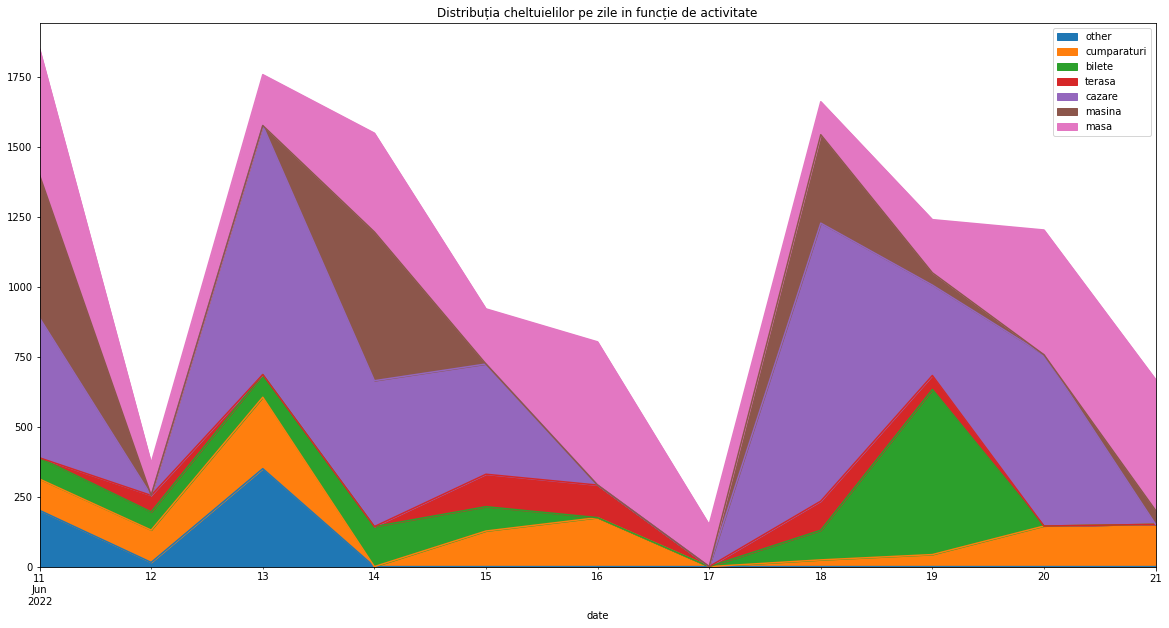

In [385]:
sdf.groupby('date').sum().plot.area(title='Distribuția cheltuielilor pe zile in funcție de activitate', figsize= (20,10))

array([[<AxesSubplot:ylabel='2022-06-11 00:00:00'>,
        <AxesSubplot:ylabel='2022-06-12 00:00:00'>,
        <AxesSubplot:ylabel='2022-06-13 00:00:00'>,
        <AxesSubplot:ylabel='2022-06-14 00:00:00'>],
       [<AxesSubplot:ylabel='2022-06-15 00:00:00'>,
        <AxesSubplot:ylabel='2022-06-16 00:00:00'>,
        <AxesSubplot:ylabel='2022-06-17 00:00:00'>,
        <AxesSubplot:ylabel='2022-06-18 00:00:00'>],
       [<AxesSubplot:ylabel='2022-06-19 00:00:00'>,
        <AxesSubplot:ylabel='2022-06-20 00:00:00'>,
        <AxesSubplot:ylabel='2022-06-21 00:00:00'>, <AxesSubplot:>]],
      dtype=object)

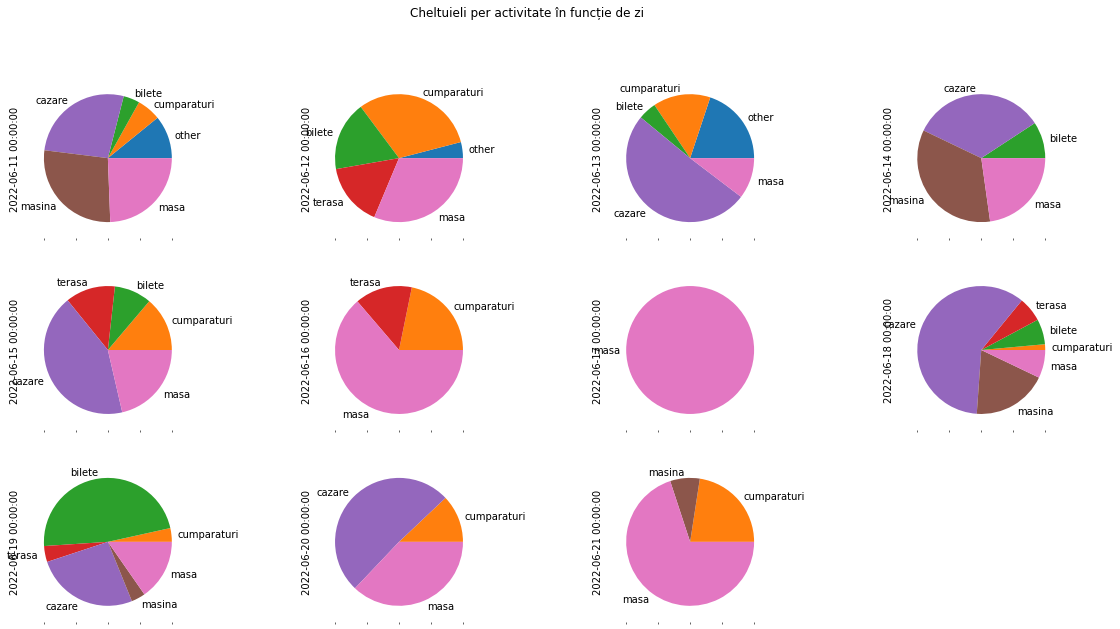

In [386]:
sdf.groupby('date').sum().T.plot.pie(title = 'Cheltuieli per activitate în funcție de zi', subplots=True, figsize=(20, 10), layout=(3,4),legend=False, )


<AxesSubplot:title={'center':'Distribuția totală pe activități'}, ylabel='total'>

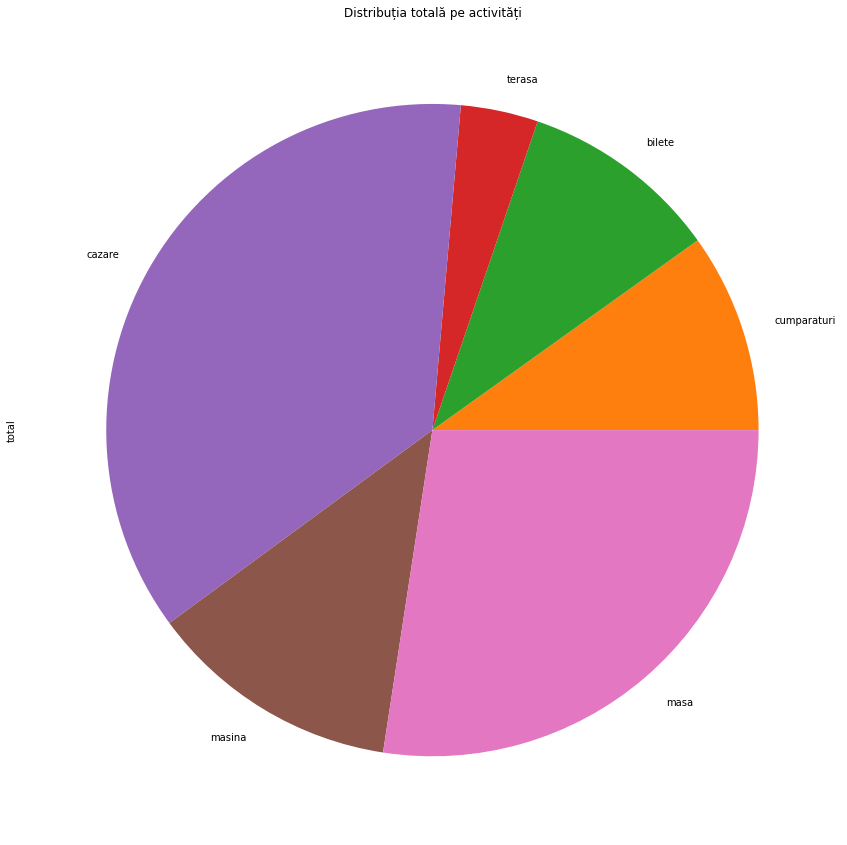

In [387]:
x = sdf.drop(labels=['user'],axis=1).T
x['total'] = x[1:].sum(axis=1)
x.plot.pie(title='Distribuția totală pe activități',y='total', figsize=(30, 15), legend = False)

<AxesSubplot:title={'center':'Distribuția cheltuielilor pe zile în funcție de persoană'}, xlabel='date'>

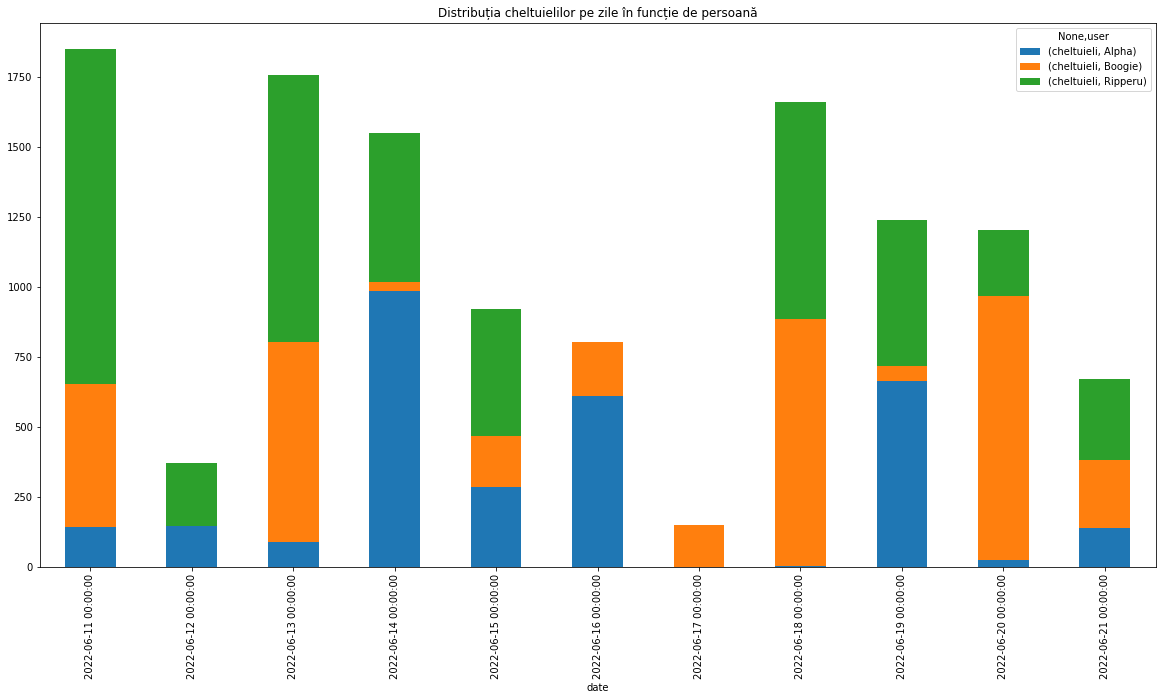

In [388]:
z = sdf.groupby(['date','user']).sum()
z['cheltuieli'] = z[activities_dict.keys()].sum(axis=1)
z = z.drop(labels=activities_dict.keys(), axis=1)
z.unstack().plot.bar(title='Distribuția cheltuielilor pe zile în funcție de persoană', figsize= (20,10), stacked = True)

array([[<AxesSubplot:ylabel='other'>, <AxesSubplot:ylabel='cumparaturi'>,
        <AxesSubplot:ylabel='bilete'>, <AxesSubplot:ylabel='terasa'>],
       [<AxesSubplot:ylabel='cazare'>, <AxesSubplot:ylabel='masina'>,
        <AxesSubplot:ylabel='masa'>, <AxesSubplot:>]], dtype=object)

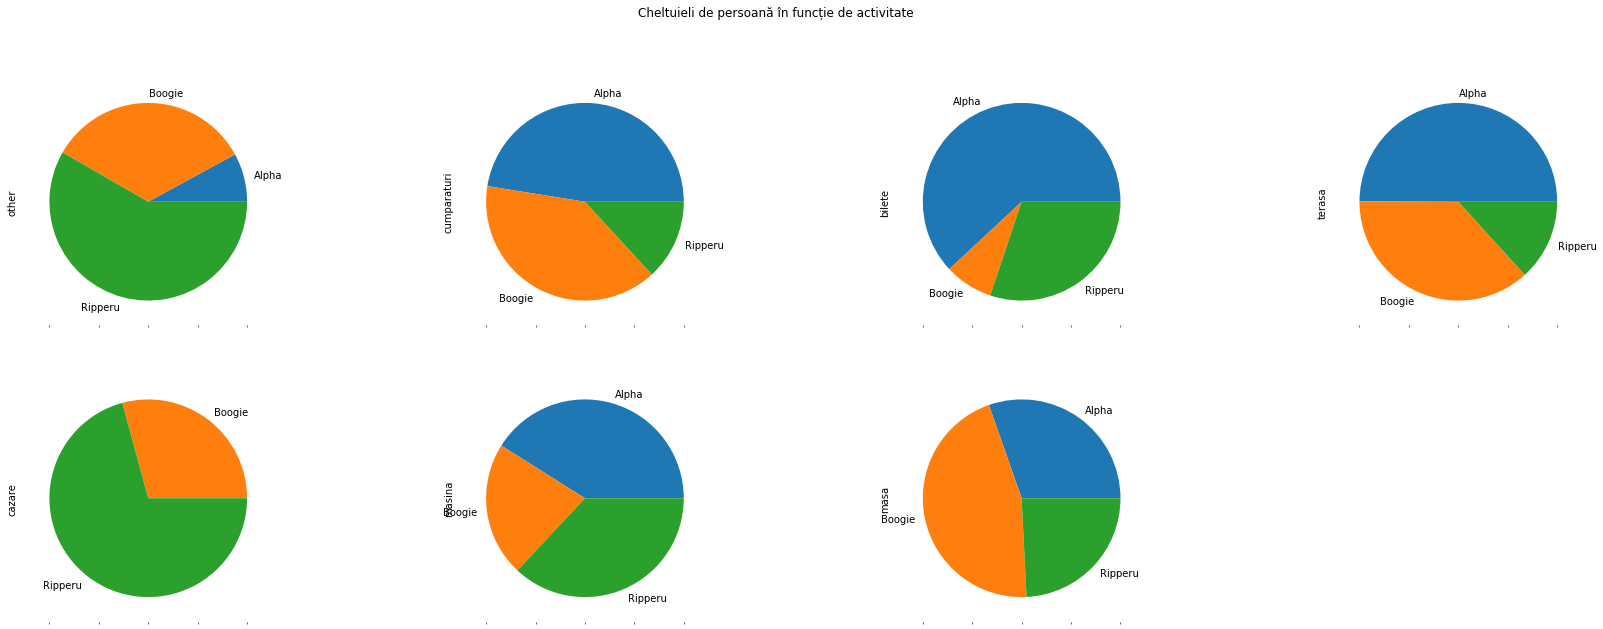

In [389]:
 sdf.groupby('user').sum().plot.pie(title = 'Cheltuieli de persoană în funcție de activitate', subplots=True, figsize=(30, 10), layout=(2,4), legend=False)

<AxesSubplot:title={'center':'Distribuția totală pe persoană'}, ylabel='None'>

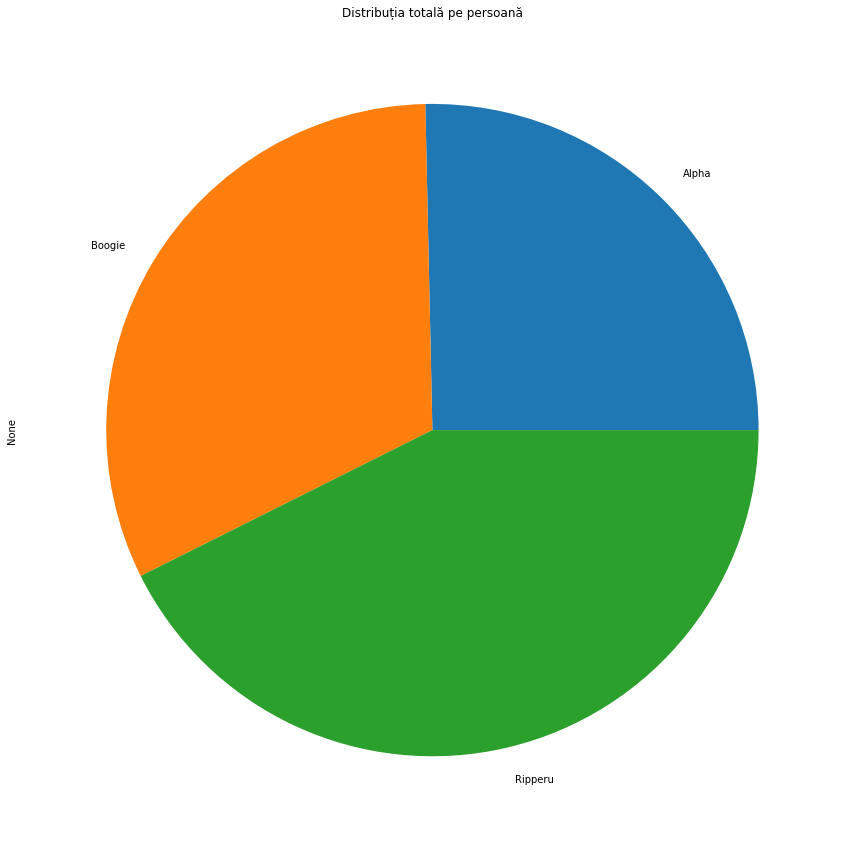

In [390]:
sdf.groupby('user').sum().sum(axis=1).plot.pie(title='Distribuția totală pe persoană',y='total', figsize=(30, 15), legend = False)

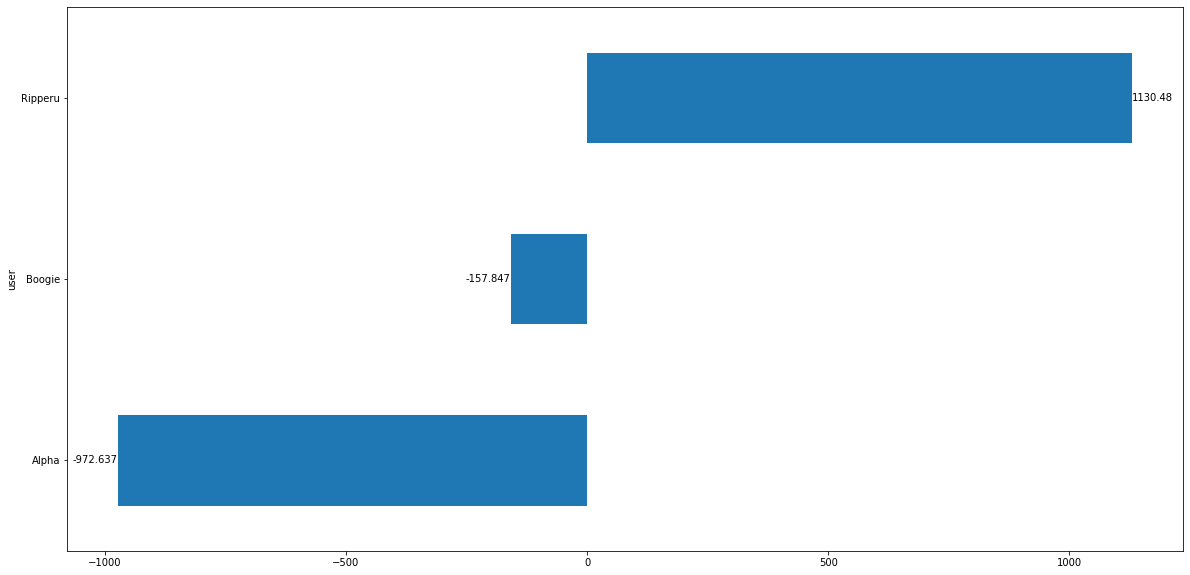

In [394]:
total = sdf.groupby('user').sum().sum(axis=1).sum()
ax = sdf.groupby('user').sum().sum(axis=1).to_frame(name='left_over').apply(lambda a: a - total/3).plot.barh(figsize=(20, 10), legend = False)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()